In [1]:
### Loading packages

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Import data
data=pd.read_csv('files/Titanic.csv')

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


C:\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


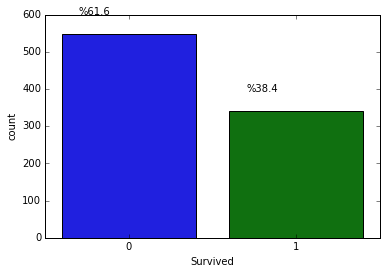

In [2]:
# % Survived
%matplotlib inline
ax = sns.countplot('Survived',data=data)
total = len(data)*1.0
#ax = (data.Survived.value_counts()*100/len(data)).sort_index().plot(kind="bar", rot=0)
for p in ax.patches:
        ax.annotate('%{:.1f}'.format(p.get_height()*100/total), (p.get_x()+0.1, p.get_height()+50))
plt.show()

In [3]:
# Below function is to show multiple table outputs side by side
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

# We can perform a crosstab on the categorical variable with the Survive flag to check the relation

pc = pd.crosstab(data.Pclass,data.Survived,margins=True)
sx = pd.crosstab(data.Sex,data.Survived,margins=True)
sp = pd.crosstab(data.SibSp,data.Survived,margins=True)
prc = pd.crosstab(data.Parch,data.Survived,margins=True)
em = pd.crosstab(data.Embarked,data.Survived,margins=True)

display_side_by_side(pc,sx,sp,prc,em)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891
Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


In [4]:
# Descriptive statistics on the continuous variables
data[['Age','Fare']].describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


In [5]:
# Descriptive Stat by Survived class
c0 = data.loc[data['Survived']==0,['Age','Fare']].describe()
c1 = data.loc[data['Survived']==1,['Age','Fare']].describe()
display_side_by_side(c0,c1)

,Age,Fare
count,424.000000,549.000000
mean,30.626179,22.117887
std,14.172110,31.388207
min,1.000000,0.000000
25%,21.000000,7.854200
50%,28.000000,10.500000
75%,39.000000,26.000000
max,74.000000,263.000000
,Age,Fare
count,290.000000,342.000000


In [6]:
# Check Missing values
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# Imputing Age variable

### We can impute missing value, in this case the Age, by the mean value. But there is a challenge, but if we use mean for imputation, then even a kid can get assigned an age of 29 years, which will give a wrong picture
### This can distort our model results
### Name title can give us a sense of the Age bracket (Mr, Mrs, Master...)
### Hence, we can impute by calculating mean age by the name title

#Extract Title
data['title']=0
for i in data:
    data['title']=data.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations

pd.crosstab(data.title,data.Sex).T.style.background_gradient(cmap='summer_r')

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)


title,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [8]:
# Clean the title column
data['title'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                      ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

data.groupby('title',group_keys=False).apply(lambda g: g.Age.mean())
age_by_title = data.groupby('title',as_index=False)['Age'].mean()

data['meanAge'] = pd.merge(pd.DataFrame(data['title']),age_by_title,on='title',how='inner')['Age']

data.loc[data.Age.isnull(),'Age'] = data.loc[data.Age.isnull(),'meanAge'] 

# Check missing age count
sum(data.Age.isnull())

0

In [9]:
### Impute 'Embarked' using mode (category with highest frequency)

data['Embarked'].fillna('S',inplace=True)
sum(data.Embarked.isnull())

0

In [10]:
# We can reduce some of the categories in Sibsp and Parch by creating group

data.SibSp = ["1+" if x > 1 else str(x) for x in data.SibSp]
data.Parch = ["1+" if x > 1 else x for x in data.Parch]

# Convert into catgorical
data.Pclass = data.Pclass.astype('category')
data.SibSp = data.SibSp.astype('category')
data.Parch = data.Parch.astype('category')

data_dummy = pd.get_dummies(data[['Pclass', 'Sex', 'Embarked','SibSp', 'Parch']], drop_first=True)

In [11]:
data2 = pd.concat([data[['PassengerId', 'Survived', 'Age', 'Fare']], data_dummy],axis=1)
data2.head()

,PassengerId,Survived,Age,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,SibSp_1,SibSp_1+,Parch_1,Parch_1+
0,1,0,22.0,7.2500,0,1,1,0,1,1,0,0,0
1,2,1,38.0,71.2833,0,0,0,0,0,1,0,0,0
2,3,1,26.0,7.9250,0,1,0,0,1,0,0,0,0
3,4,1,35.0,53.1000,0,0,0,0,1,1,0,0,0
4,5,0,35.0,8.0500,0,1,1,0,1,0,0,0,0


In [12]:
# Split the data into 3 sets - train, validation and test
# We will split in the ration 72-18-10 %
import sklearn
from sklearn.model_selection import train_test_split


nrow = len(data)
X_train, X_val = sklearn.model_selection.train_test_split(data2.iloc[:,2:],test_size=int(nrow*0.1),random_state=1)
X_train, X_test = sklearn.model_selection.train_test_split(X_train,test_size=int(nrow*0.2),random_state=1)

Y = data2.iloc[:,1].astype('category')
Y_train, Y_val = sklearn.model_selection.train_test_split(Y,test_size=int(nrow*0.1),random_state=1)
Y_train, Y_test = sklearn.model_selection.train_test_split(Y_train,test_size=int(nrow*0.2),random_state=1)

In [13]:

### Now we will run our first version of model
# Model on Train Data
import statsmodels.api as sm

logit_model=sm.Logit(Y_train,sm.add_constant(X_train))
result=logit_model.fit()
result.summary2()

C:\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Optimization terminated successfully.
         Current function value: 0.432712
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Logit
===============================================================
Model:              Logit            No. Iterations:   6.0000  
Dependent Variable: Survived         Pseudo R-squared: 0.350   
Date:               2018-06-19 12:37 AIC:              564.0246
No. Observations:   624              BIC:              617.2584
Df Model:           11               Log-Likelihood:   -270.01 
Df Residuals:       612              LL-Null:          -415.28 
Converged:          1.0000           Scale:            1.0000  
---------------------------------------------------------------
                Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------
const           3.8012   0.5572   6.8218 0.0000  2.7090  4.8933
Age            -0.0344   0.0090  -3.8418 0.0001 -0.0520 -0.0169
Fare            0.0002   0.0029   0.0638 0.9491 -0.0055  0.0059
Pclass_2       -0.9088   0.3667  -2.4785 0.0132 -1.6274 -0.1901
Pclass_3       -2.0982   0.3529  -5.9453 0.0000 -2.7899 -1.4065
Sex_male       -2.7102   0.2456 -11.0350 0.0000 -3.1916 -2.2288
Embarked_Q      0.0105   0.4549   0.0230 0.9817 -0.8811  0.9020
Embarked_S     -0.4801   0.2913  -1.6484 0.0993 -1.0510  0.0907
SibSp_1         0.2285   0.2704   0.8451 0.3980 -0.3014  0.7585
SibSp_1+       -1.3666   0.4672  -2.9249 0.0034 -2.2823 -0.4508
Parch_1         0.6191   0.3402   1.8198 0.0688 -0.0477  1.2859
Parch_1+       -0.2717   0.3987  -0.6813 0.4957 -1.0532  0.5098
===============================================================

"""

In [14]:
# confusion matrix
# The output comes in the from Actual-0,pred-0 ; Actual-0,pred-1 ; Actual-1,pred-1 ; Actual-1,pred-1 
# reading in clockwise direction
result.pred_table()

array([[ 343.,   42.],
       [  66.,  173.]])

In [15]:
# Calculate using probability cutoff and predicted probabilities

cutoff = 0.5 # predicted prob above 0.5 will be categorised as 1

pred_prob = result.predict()
pred_class = [1 if x > cutoff else 0 for x in pred_prob]

TN = sum([1 if pred_class[i] == 0 and list(Y_train)[i] == 0 else 0 for i in range(0,len(Y_train))])
FP = sum([1 if pred_class[i] == 1 and list(Y_train)[i] == 0 else 0 for i in range(0,len(Y_train))])
TP = sum([1 if pred_class[i] == 1 and list(Y_train)[i] == 1 else 0 for i in range(0,len(Y_train))])
FN = sum([1 if pred_class[i] == 0 and list(Y_train)[i] == 1 else 0 for i in range(0,len(Y_train))])
Precision = round(TP*100/(TP+FP),2)
Recall = round(TP*100/(TP+FN),2)

print('TN = ' + str(TN))
print('FP = ' + str(FP))
print('TP = ' + str(TP))
print('FN = ' + str(FN))

print('Accuracy = ' + str(TN + TP) + ' which is ' + str(round((TN+TP)*100/len(Y_train),2)) + '%')
print('Precision : ' + str(Precision) + '%')
print('Recall : ' + str(Recall) + '%')

TN = 343
FP = 42
TP = 173
FN = 66
Accuracy = 516 which is 82.69%
Precision : 80.47%
Recall : 72.38%
